[![AnalyticsDojo](../fig/final-logo.png)](http://rpi.analyticsdojo.com)
<center><h1>Introduction to Modeling - Origional Boston Housing </h1></center>
<center><h3><a href = 'http://rpi.analyticsdojo.com'>rpi.analyticsdojo.com</a></h3></center>

In [7]:
#This uses the same mechansims. 
%matplotlib inline

## Overview
- Getting the Data
- Reviewing Data
- Modeling 
- Model Evaluation
- Using Model
- Storing Model


## Getting Data 
- Available in the [sklearn package](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) as a Bunch object (dictionary).
- From FAQ: ["Don’t make a bunch object! They are not part of the scikit-learn API. Bunch objects are just a way to package some numpy arrays. As a scikit-learn user you only ever need numpy arrays to feed your model with data."](http://scikit-learn.org/stable/faq.html)
- Available in the UCI data repository. 
- Better to convert to Pandas dataframe. 

In [1]:
#From sklearn tutorial.
from sklearn.datasets import load_boston
boston = load_boston()
print( "Type of boston dataset:", type(boston))


Type of boston dataset: <class 'sklearn.utils.Bunch'>


In [2]:
#A bunch is you remember is a dictionary based dataset.  Dictionaries are addressed by keys. 
#Let's look at the keys. 
print(boston.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [11]:
#DESCR sounds like it could be useful. Let's print the description.
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
# Let's change the data to a Panda's Dataframe
import pandas as pd
boston_df = pd.DataFrame(boston['data'] )
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#Now add the column names.
boston_df.columns = boston['feature_names']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
#Add the target as PRICE. 
boston_df['PRICE']= boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


 ## Attribute Information (in order):
 Looks like they are all continuous IV and continuous DV. 
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in 1000's
 Let's check for missing values.

In [10]:
import numpy as np
#check for missing values
print(np.sum(np.isnan(boston_df)))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


## What type of data are there?
- First let's focus on the dependent variable, as the nature of the DV is critical to selection of model. 
- *Median value of owner-occupied homes in $1000's* is the Dependent Variable  (continuous variable).
- It is relevant to look at the distribution of the dependent variable, so let's do that first.
- Here there is a normal distribution for the most part, with some at the top end of the distribution we could explore later.

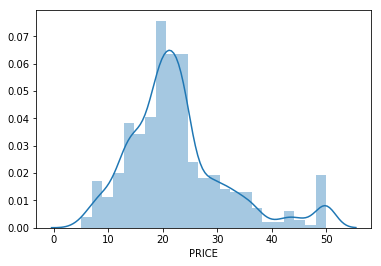

In [11]:
#Let's us seaborn, because it is pretty. ;) 
#See more here. http://seaborn.pydata.org/tutorial/distributions.html
import seaborn as sns
sns.distplot(boston_df['PRICE']);

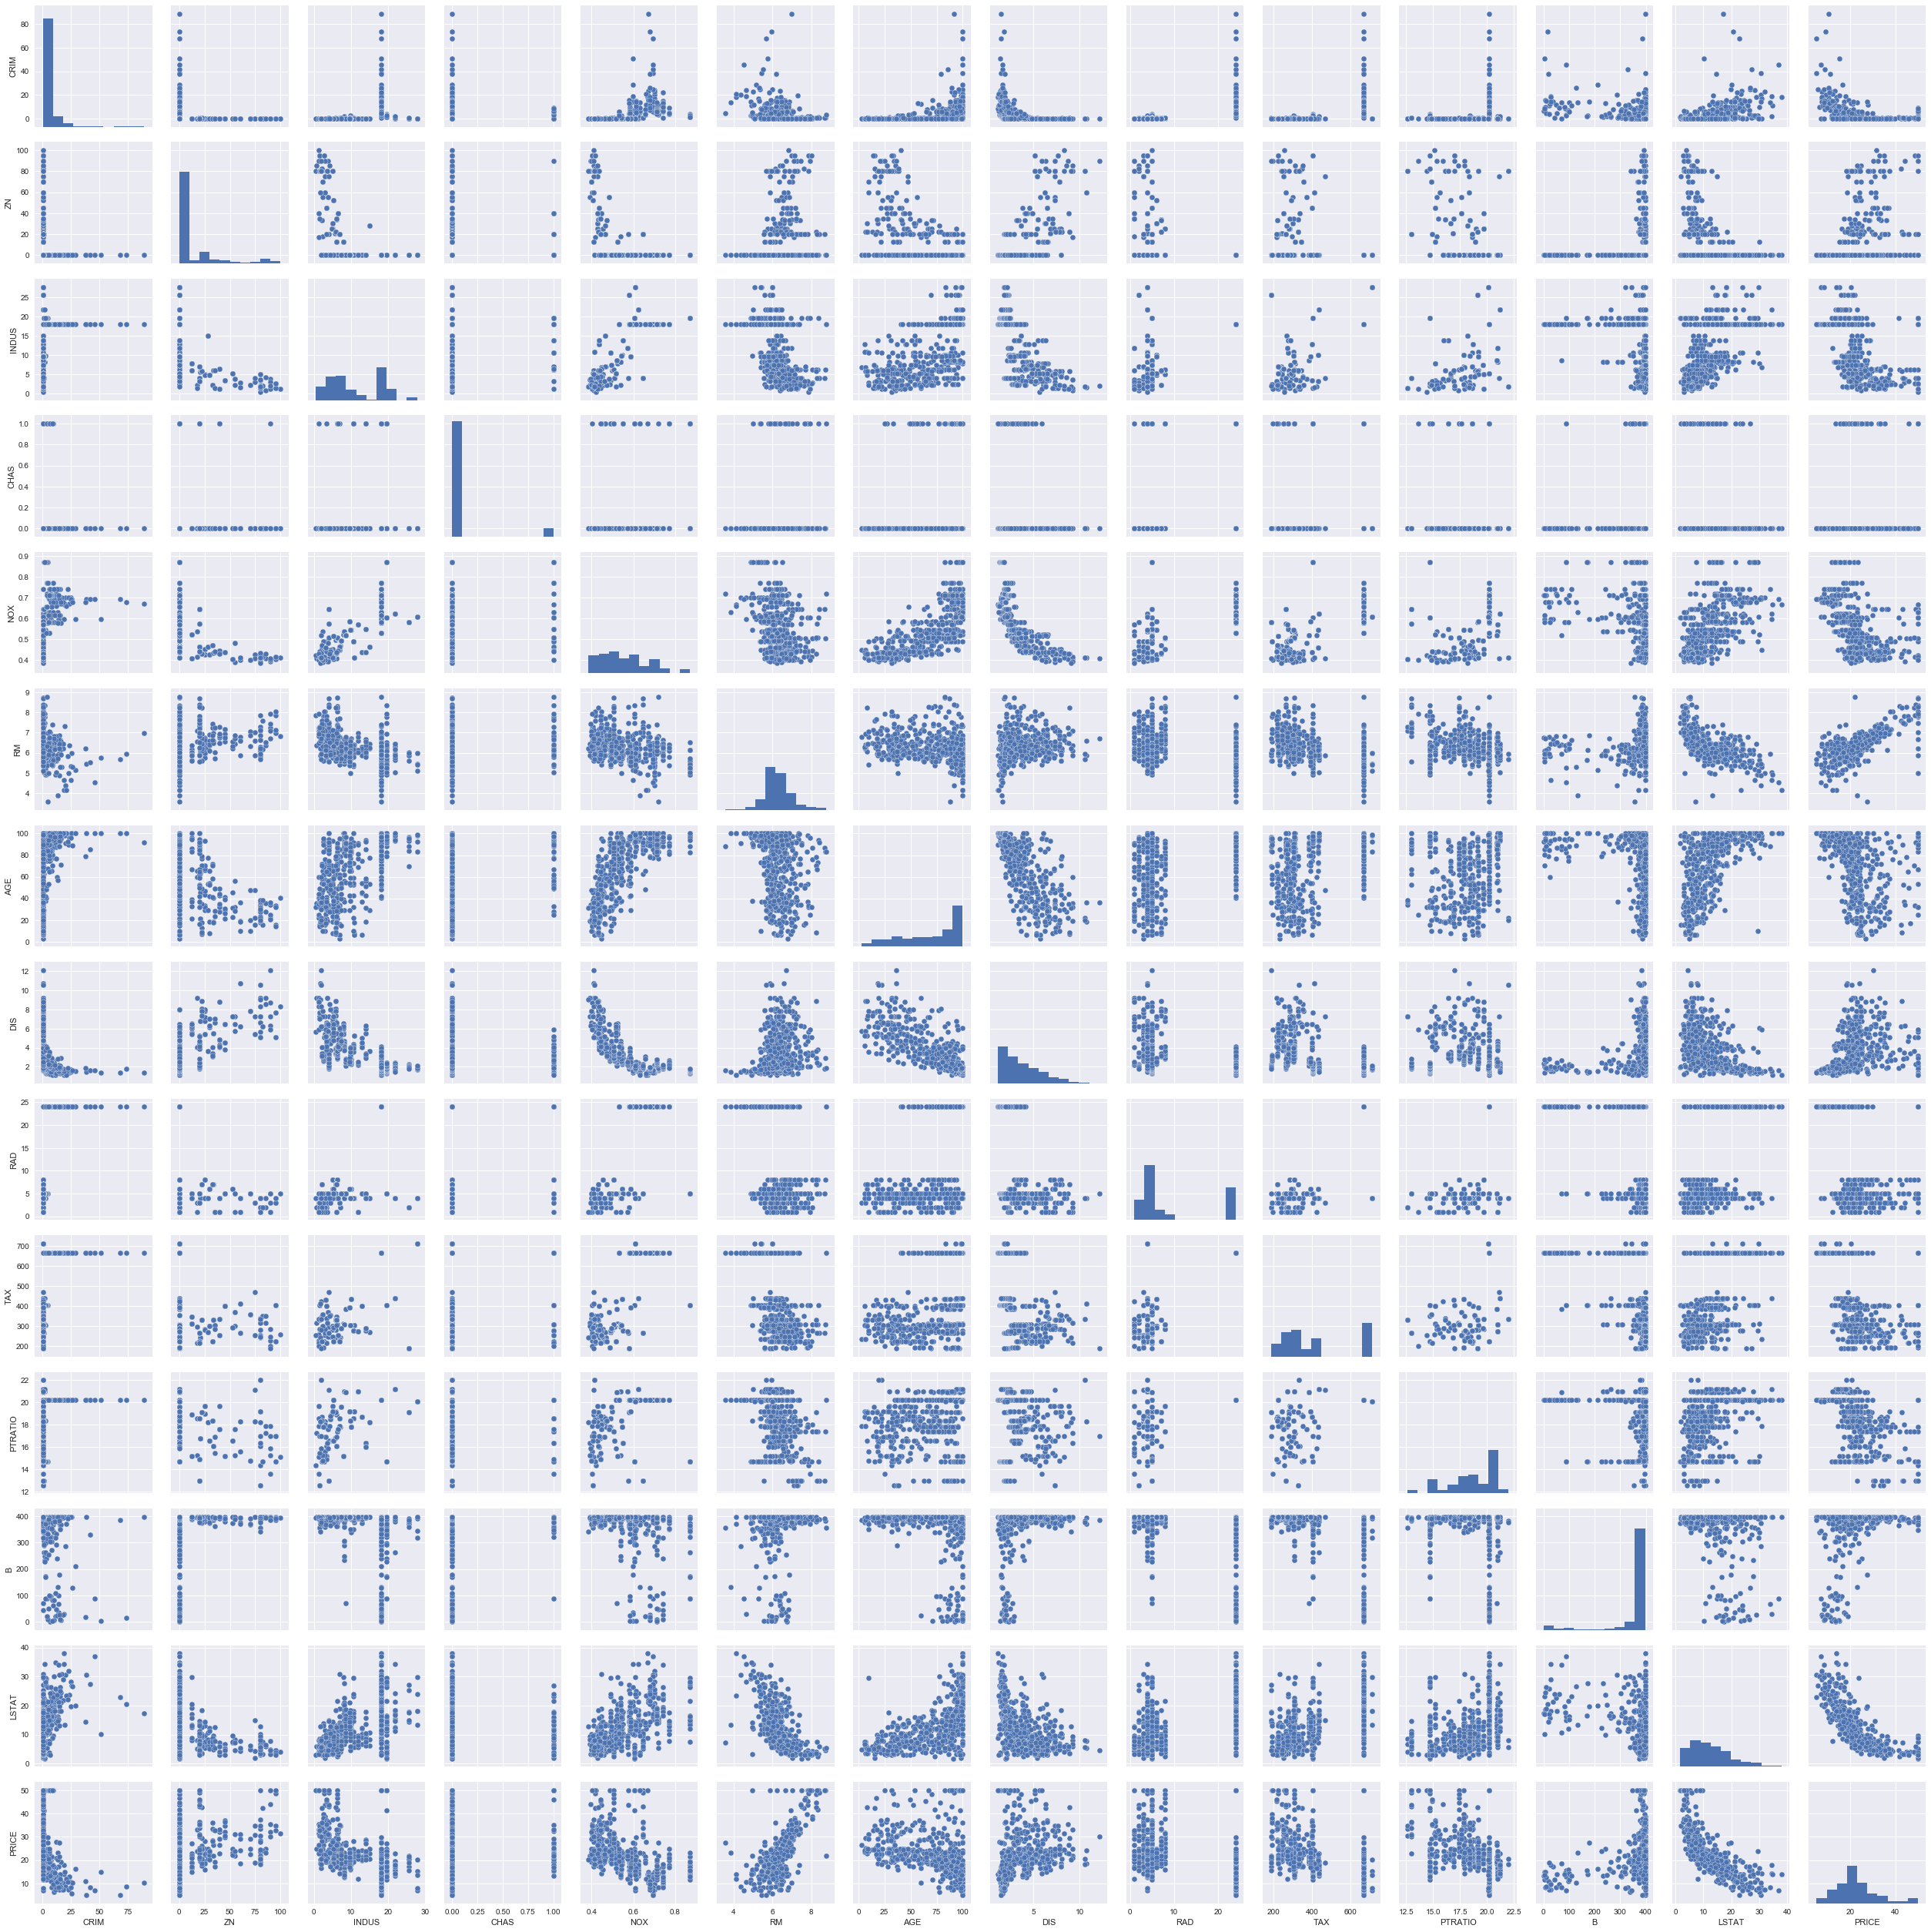

In [19]:
#We can quickly look at other data. 
#Look at the bottom row to see thinks likely coorelated with price. 
#Look along the diagonal to see histograms of each. 
sns.pairplot(boston_df);

## Preparing to Model 
- It is common to separate `y` as the dependent variable and `X` as the matrix of independent variables.
- Here we are using `train_test_split` to split the test and train.
- This creates 4 subsets, with IV and DV separted: `X_train, X_test, y_train, y_test`
 


In [12]:
#This will throw and error at import if haven't upgraded. 
# from sklearn.cross_validation  import train_test_split  
from sklearn.model_selection  import train_test_split
#y is the dependent variable.
y = boston_df['PRICE']
#As we know, iloc is used to slice the array by index number. Here this is the matrix of 
#independent variables.
X = boston_df.iloc[:,0:13]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(354, 13) (152, 13) (354,) (152,)


## Modeling 
- First import the package: `from sklearn.linear_model import LinearRegression`
- Then create the model object.  
- Then fit the data. 
- This creates a trained model (an object) of class regression.
- The variety of methods and attributes available for regression are shown [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).


In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit( X_train, y_train )


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluating the Model Results
- You have fit a model. 
- You can now store this model, save the object to disk, or evaluate it with different outcomes. 
- Trained regression objects have coefficients (`coef_`) and intercepts (`intercept_`) as attributes. 
- R-Squared is determined from the `score` method of the regression object.
- For Regression, we are going to use the coefficient of determination as our way of evaluating the results, [also referred to as R-Squared](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [14]:
print('labels\n',X.columns)
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
print('R2 for Train)', lm.score( X_train, y_train ))
print('R2 for Test (cross validation)', lm.score(X_test, y_test))

labels
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Coefficients: 
 [ -1.19858618e-01   4.44233009e-02   1.18612465e-02   2.51295058e+00
  -1.62710374e+01   3.84909910e+00  -9.85471557e-03  -1.50002715e+00
   2.41507916e-01  -1.10671867e-02  -1.01897720e+00   6.95273216e-03
  -4.88110587e-01]
Intercept: 
 37.9925927703
R2 for Train) 0.764456339182
R2 for Test (cross validation) 0.673528086535


In [15]:
#Alternately, we can show the results in a dataframe using the zip command.
pd.DataFrame( list(zip(X.columns, lm.coef_)),
            columns=['features', 'estimatedCoeffs'])

,features,estimatedCoeffs
0,CRIM,-0.119859
1,ZN,0.044423
2,INDUS,0.011861
3,CHAS,2.512951
4,NOX,-16.271037
5,RM,3.849099
6,AGE,-0.009855
7,DIS,-1.500027
8,RAD,0.241508
9,TAX,-0.011067


## Cross Validation and Hyperparameter Tuning
- The basic way of having a train and a test set can result in overfitting if there are parameters within the model that are being optimized. [Further described here](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation).  
- Because of this, a third validation set can be partitioned, but at times there isn't enough data.
- So Cross validation can split the data into (`cv`) different datasets and check results. 
- Returning MSE rather than R2. 

In [16]:
#NOTE: This may error out if you have not upgraded sklearn.  Restart kernal after up upgraded.
#Old syntax was:
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X, y, cv=8) 
print("Scores:", scores, "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



Scores: [ 0.75014285  0.42039086  0.71854702  0.57190316  0.75650376 -0.37306354
 -0.35181135  0.33556184] Accuracy: 0.35 (+/- 0.87)


## Calculation of Null Model 
- We also want to compare a null model (baseline model) with our result.  
- To do this, we have to generate an array of equal size to the train and test set. 


In [17]:
#Here we need to constructor our Base model 
#This syntax multiplies a list by a number, genarating a list of length equal to that number.
#Then we can cast it as a Pandas series.
y_train_base = pd.Series([np.mean(y_train)] * y_train.size)
y_test_base = pd.Series([np.mean(y_train)] * y_test.size)
print(y_train_base.head(), '\n Size:', y_train_base.size)
print(y_test_base.head(), '\n Size:', y_test_base.size)

0    22.74548
1    22.74548
2    22.74548
3    22.74548
4    22.74548
dtype: float64 
 Size: 354
0    22.74548
1    22.74548
2    22.74548
3    22.74548
4    22.74548
dtype: float64 
 Size: 152


## Scoring of Null Model
- While previously we generated the R2 score from the `fit` method, passing X and Y, we can also score the r2 using the `r2_score` method, which is imported from sklearn.metrix.
- The `r2_score` method accepts that true value and the predicted value.  

In [18]:
from sklearn.metrics import r2_score
r2_train_base= r2_score(y_train, y_train_base)
r2_train_reg = r2_score(y_train, lm.predict(X_train))

r2_test_base = r2_score(y_test, y_test_base)
r2_test_reg = r2_score(y_test, lm.predict(X_test))
print(r2_train_base, r2_train_reg,r2_test_base,r2_test_reg  )

-2.22044604925e-16 0.764456339182 -0.00601973194769 0.673528086535


## Scoring of Null Model
- We got a 0 R-squared for our model.  Why 0?  
- This is where it is important to understand what R-squared is actually measuring.
- On the left side you see the total sum of squared values (ss_tot_train below).  
- On the right you see the sum of squares regression (ss_reg_train).
- For the null model, the ss_tot_train = ss_reg_train, so R-squared = 0.
<br>
![](https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg)
- By Orzetto (Own work) [CC BY-SA 3.0 (http://creativecommons.org/licenses/by-sa/3.0) or GFDL (http://www.gnu.org/copyleft/fdl.html)], via Wikimedia Commons

In [19]:
#total sum of squares 
ss_tot_train=np.sum((y_train-np.mean(y_train))**2)
ss_res_train=np.sum((y_train-lm.predict(X_train))**2)
ss_reg_train=np.sum((lm.predict(X_train)-np.mean(y_train))**2)

r2_train_reg_manual= 1-(ss_res_train/ss_tot_train)

print(r2_train_reg, r2_train_reg_manual, ss_tot_train, ss_res_train, ss_reg_train )




0.764456339182 0.7644563391821221 30006.637768361576 7067.8733087958835 22938.7644596


## Predict Outcomes
- The regression predict uses the trained coefficients and accepts input.  
- Here, by passing the origional from boston_df, we can create a new column for the predicted value. 


In [20]:
boston_df['PRICE_REG']=lm.predict(boston_df.iloc[:,0:13])
boston_df[['PRICE', 'PRICE_REG']].head()

,PRICE,PRICE_REG
0,24.0,30.299242
1,21.6,24.893976
2,34.7,30.476052
3,33.4,28.475067
4,36.2,27.810605


## Graph Outcomes
- Common to grapy predicted vs actual.
- Results should show a randomly distributed error function. 
- Note that there seem to be much larger errors on right side of grant, suggesting something else might be impacting highest values. 



Text(0.5,1,'Real vs Predicted Housing Prices')

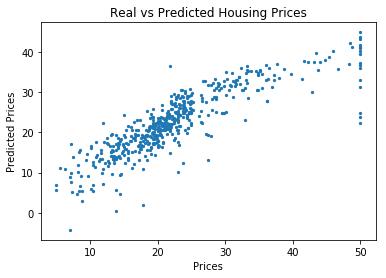

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter( boston_df['PRICE'], boston_df['PRICE_REG'], s=5 )
plt.xlabel( "Prices")
plt.ylabel( "Predicted Prices")
plt.title( "Real vs Predicted Housing Prices")

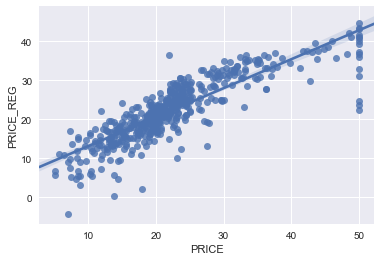

In [22]:
#Let's make it look pretty with pickle
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="PRICE", y="PRICE_REG", data=boston_df[['PRICE','PRICE_REG']])

## Graph Residuals
- Common to graph predicted - actual (error term).
- Results should show a randomly distributed error function. 
- Here we are showing train and test as different 



Text(0,0.5,'Residuals')

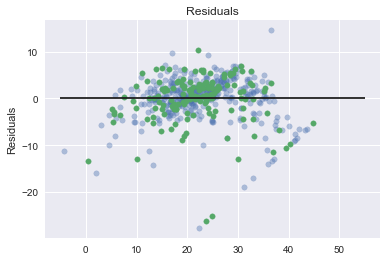

In [23]:
#
plt.scatter( lm.predict(X_train), lm.predict(X_train) - y_train,
           c ='b', s=30, alpha=0.4 )
plt.scatter( lm.predict(X_test), lm.predict(X_test) - y_test,
           c ='g', s=30 )
#The expected error is 0. 
plt.hlines( y=0, xmin=-5, xmax=55)
plt.title( "Residuals" )
plt.ylabel( "Residuals" )

## Persistent Models
- I could be that you would want to maintain 
- The `pickle` package enables storing objects to disk and then retreive them. 
- For example, for a trained model we might want to store it, and then use it to score additional data.


In [24]:
#save the data
boston_df.to_csv('../input/boston.csv')

In [25]:
import pickle
pickle.dump( lm, open( '../input/lm_reg_boston.p', 'wb' ) )

In [26]:
#Load the pickled object. 
lm_pickled = pickle.load( open( "../input/lm_reg_boston.p", "rb" ) )

lm_pickled.score(X_train, y_train)

0.76445633918212219


Copyright [AnalyticsDojo](http://rpi.analyticsdojo.com) 2016.
This work is licensed under the [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/) license agreement.
